In [1]:
import disentangler as dt
from disentangler.dependencies import *

## Model without correction

In [2]:
rna_data, atac_data = dt.bonemarrow.utils.load_GEX_data(), dt.bonemarrow.utils.load_ATAC_data()

In [3]:
rna_model = mira.topics.load_model(dt.bonemarrow.config.MIRA_RNA_NO_CORRECTION)
atac_model = mira.topics.load_model(dt.bonemarrow.config.MIRA_ATAC_NO_CORRECTION)

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


In [5]:
atac_model.predict(atac_data)
rna_model.predict(rna_data)

Predicting latent vars:   0%|          | 0/263 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21, topic_22, topic_23, topic_24, topic_25, topic_26, topic_27, topic_28, topic_29, topic_30
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations


Predicting latent vars:   0%|          | 0/247 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21, topic_22, topic_23, topic_24, topic_25
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations


In [6]:
atac_model.get_umap_features(atac_data, box_cox=0.2)
rna_model.get_umap_features(rna_data, box_cox=0.2)

rna_data, atac_data = mira.utils.make_joint_representation(rna_data, atac_data)

In [8]:
rp_args = dict(
    expr_adata = rna_data,
    atac_adata = atac_data,
)

In [13]:
atac_data.var[['chr','start','end']] = \
    list(map(list, atac_data.var_names.str.split('-')))

In [14]:
mira.tl.get_distance_to_TSS(atac_data,
                            tss_data = 'data/bonemarrow/hg38_tss_data.bed12.filtered',
                            genome_file= 'data/bonemarrow/hg38.chrom.sizes'
                           )

INFO:mira.tools.connect_genes_peaks:Finding peak intersections with promoters ...
INFO:mira.tools.connect_genes_peaks:Calculating distances between peaks and TSS ...
INFO:mira.tools.connect_genes_peaks:Masking other genes' promoters ...
INFO:mira.adata_interface.rp_model:Added key to var: distance_to_TSS
INFO:mira.adata_interface.rp_model:Added key to uns: distance_to_TSS_genes


In [11]:
litemodel = mira.rp.LITE_Model.load_dir(
    expr_model=rna_model,
    accessibility_model=atac_model,
    counts_layer='counts',
    prefix = 'data/bonemarrow/rp/litemodels_NOBATCH/'
)

In [12]:
litemodel.predict(**rp_args)

INFO:mira.adata_interface.core:Added cols to obs: model_read_scale
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


Calculating softmax summary data:   0%|          | 0/239 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added cols to obs: softmax_denom
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


Calculating softmax summary data:   0%|          | 0/239 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added cols to obs: softmax_denom


Predicting expression:   0%|          | 0/2813 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added layer: LITE_prediction
INFO:mira.adata_interface.core:Added layer: LITE_logp


In [13]:
rna_data.layers['NOBATCH_LITE_logp'] = rna_data.layers['LITE_logp'].copy()
rna_data.layers['NOBATCH_LITE_prediction'] = rna_data.layers['LITE_prediction'].copy()

In [14]:
del rna_data.obs['model_read_scale'], rna_data.obs['softmax_denom'], atac_data.obs['softmax_denom']

In [15]:
del rna_data.obsm['X_topic_compositions'], atac_data.obsm['X_topic_compositions']

## Using disentangled models

In [3]:
rna_model = mira.topics.load_model(dt.bonemarrow.config.MIRA_RNA + '2')
atac_model = mira.topics.load_model(dt.bonemarrow.config.MIRA_ATAC)
atac_model.predict(atac_data)
rna_model.predict(rna_data)

INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/liulab/alynch/projects/batcheffect-env/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


Predicting latent vars:   0%|          | 0/263 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21, topic_22, topic_23, topic_24
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations


Predicting latent vars:   0%|          | 0/247 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added key to obsm: X_topic_compositions
INFO:mira.adata_interface.topic_model:Added cols: topic_0, topic_1, topic_2, topic_3, topic_4, topic_5, topic_6, topic_7, topic_8, topic_9, topic_10, topic_11, topic_12, topic_13, topic_14, topic_15, topic_16, topic_17, topic_18, topic_19, topic_20, topic_21
INFO:mira.adata_interface.core:Added key to varm: topic_feature_compositions
INFO:mira.adata_interface.core:Added key to varm: topic_feature_activations


In [4]:
corrected_litemodel = mira.rp.LITE_Model.load_dir(
    expr_model=rna_model,
    accessibility_model=atac_model,
    counts_layer='counts',
    prefix = 'data/bonemarrow/rp/litemodels_adjusted//'
)

In [5]:
from scipy import sparse

In [6]:
rna_data.layers['batch_effect'] = sparse.csc_matrix(rna_data.shape)

In [10]:
atac_model.get_umap_features(atac_data, box_cox=0.2)
rna_model.get_umap_features(rna_data, box_cox=0.2)

rna_data, atac_data = mira.utils.make_joint_representation(rna_data, atac_data)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm
INFO:mira.adata_interface.core:Added key to obsm: X_umap_features
INFO:mira.adata_interface.utils:61127 out of 69076 cells shared between datasets (88%).
INFO:mira.adata_interface.utils:Key added to obsm: X_joint_umap_features


In [11]:
rp_args = dict(
    expr_adata = rna_data,
    atac_adata = atac_data,
)

In [15]:
corrected_litemodel.predict(**rp_args)

INFO:mira.adata_interface.core:Added cols to obs: model_read_scale
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


Calculating softmax summary data:   0%|          | 0/239 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added cols to obs: softmax_denom
INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


Calculating softmax summary data:   0%|          | 0/239 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added cols to obs: softmax_denom


Predicting expression:   0%|          | 0/2841 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added layer: LITE_prediction
INFO:mira.adata_interface.core:Added layer: LITE_logp


In [ ]:
rna_data.write_h5ad('data/bonemarrow/rp/rna_rp_modeled_data.h5ad')

## Make graphics

In [229]:
rna_data.var['corrected_logp'] = np.array(rna_data.layers['LITE_logp'].sum(0)).reshape(-1)/rna_data.var.n_cells_by_counts
rna_data.var['not_corrected_logp'] = np.array(rna_data.layers['NOBATCH_LITE_logp'].sum(0)).reshape(-1)/rna_data.var.n_cells_by_counts
rna_data.var['delta_logp'] = rna_data.var['corrected_logp'] - rna_data.var['not_corrected_logp']

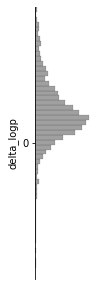

In [231]:
fig, ax = plt.subplots(1,1,figsize=(1,5))
sns.histplot(
    y = rna_data.var.loc[litemodel.features].delta_logp,
    ax = ax,
    color = 'grey',
    edgecolor = 'black',
    fill='black',
    linewidth = 0.1
)
ax.set(xticks = [], ylim = (-0.3, 0.3), yticks = [0.],
      xlabel = '')
for t in ['top','bottom','right']:
    ax.spines[t].set_visible(False)
    
plt.savefig('figure1/RP_likelihood.svg')

In [18]:
rna_model.get_batch_effect(rna_data)

INFO:mira.adata_interface.topic_model:Fetching key X_topic_compositions from obsm


Imputing features:   0%|          | 0/239 [00:00<?, ?it/s]

INFO:mira.adata_interface.core:Added layer: batch_effect


In [60]:
from mira.plots import regulatory_dynamics_plot, rp_plots

tss_data = pd.DataFrame(mira.utils.fetch_TSS_data(atac_data)).T

def set_spines(ax, spines = ['left','bottom']):
    for spine in ['left','right','top','bottom']:
        if not spine in spines:
            ax.spines[spine].set_visible(False)

In [ ]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(3, 3,  width_ratios=(7, 2, 2), height_ratios=(1,0.5,7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

panel = fig.add_subplot(gs[2, 0])
rp_model = fig.add_subplot(gs[0, 0], sharex=panel)
genetrack = fig.add_subplot(gs[1,0], sharex = panel)
score = fig.add_subplot(gs[2, 1], sharey=panel)
batcheffect = fig.add_subplot(gs[2, 2], sharey=panel)

rp_plots._plot_rp_models(rp_model, 
                         interval_chrom='chr17',
                         interval_start= 44199732,
                         interval_end= 44656763,
                         rp_models=corrected_litemodel,
                         gene_id=tss_data.index.values,
                         chrom=tss_data.gene_chrom.values,
                         start = tss_data.gene_start.values,
                         end = tss_data.gene_end.values,
                         strand = tss_data.gene_strand.values)
set_spines(rp_model, ['bottom'])
rp_model.set(yticks = [0.,1.], xticks = [])

regulatory_dynamics_plot.plot_fragment_heatmap(panel,
    accessibility=atac_data[m].X, 
    chrom = 'chr17',
    start = 44199732,
    end = 44656763,
    peaks = atac_data[m].var[['chr','start','end']].values,
    time = -atac_data[m].obs_vector('GEX_pseudotime_order')
)
set_spines(panel, ['top'])

set_spines(genetrack, [])
genetrack.set(yticks = [])

m = ~rna_data.obs.GEX_pseudotime_order.isna()
sns.scatterplot(
    ax = score,
    y = (rna_data[m].obs_vector('GEX_pseudotime_order')).argsort().argsort(),
    x = np.log(rna_data[m].obs_vector(g, layer='LITE_prediction')),
    hue = rna_data[m].obs_vector(g),
    palette=sns.color_palette('light:blue', as_cmap=True),
    s = 2,
    legend=False
)
set_spines(score, ['left', 'top'])
score.set(xticks = [], yticks = [])


sns.scatterplot(
    ax = batcheffect,
    y = (rna_data[m].obs_vector('GEX_pseudotime_order')).argsort().argsort(),
    x = rna_data[m].obs_vector(g, layer='batch_effect'),
    hue = rna_data[m].obs_vector('batch'),
    palette=dt.bonemarrow.colors.BATCH_PALETTE.values(),
    hue_order=dt.bonemarrow.colors.BATCH_PALETTE.keys(),
    s = 2,
    legend=False
)
batcheffect.set(xticks = [0], yticks = [])
set_spines(batcheffect, ['left', 'top'])
batcheffect.xaxis.set_tick_params(labeltop=True)
batcheffect.xaxis.set_tick_params(labelbottom=False)

plt.show()

Intersecting RP models with interval: 100%|████████████████████████████████████████████████████████████████████| 2841/2841 [00:00<00:00, 16712.23it/s]


Plotting fragments:   0%|          | 0/40535 [00:00<?, ?it/s]